# PREDICTING TITANIC SURVIVOR

### Objective: RMS Titanic shipwreck happened on April 15, 1912 after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. We are curious to predict the passengers survival based on features mentioned in our data set.



##We have imported necessary libraries like pandas that is used for faster data analysis, data cleaning, and data pre-processing.Pandas is built on top of the numerical library of Python, called numpy.

Seaborn is one of an amazing library based on matplotlib for visualization of the graphical statistical plotting in Python. Seaborn provides many color palettes and defaults beautiful styles to make the creation of many statistical plots in Python more attractive.

Libraries needed for model evaluation metrics like accuracy,precision,recall, F1, confusion matrix and roc_auc_score are imported.


In [52]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import cohen_kappa_score


In [53]:
#Import Train Data
Titanic_dataset = pd.read_csv('train.csv')


## Data Exploration

In data exploration we have done many steps:

    Dataset shape
    Columns classification (Categorical and Numerical features)
    Data Frame
    Correlation
    Pairplot
    Categorical count
    Check Outliers

In [54]:
Titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


This is our top five data in our dataset.

In [4]:
Titanic_dataset.shape


(891, 12)

In our dataset total 891 passengers with 12 columns.

In [5]:
Titanic_dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

These are names of different columns in our dataset.

In [6]:
 # Getting the Categorical and Numerical Features
numerical_features = [x for x in Titanic_dataset.columns if Titanic_dataset[x].dtypes != 'O']
categorical_features = [x for x in Titanic_dataset.columns if Titanic_dataset[x].dtypes == 'O']

In [7]:
numerical_features,categorical_features

(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],
 ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'])

Here, 7 columns are related to numerical features and 5 columns having categorical features.

In [8]:
Titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
Titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This is the description of our dataset. This shows that the minimum values of SibSp, Parch, Fare is zero. 177 passengers were those which have missing values related to their age.

# Correlation

Correlations measure the numerical relationship of one variable to another, a very useful way to identify variables in a modeling data set that are related to each other.

Finding pairs of variables with high correlation indicates there is redundancy in the data. Redundant variables do not provide new, additional information to predict a target variable.

If the correlation coefficient is greater than zero, it is a positive relationship. Conversely, if the value is less than zero, it is a negative relationship. A value of zero indicates that there is no relationship between the two variables.

Here,

- Independent variable ---- Pclass, sex, age, Sibsp (number of siblings/spouse),parch(Number of parents/children), PassengerId, Fare
- dependent variable----- Survived column

## Heatmap

A heatmap is very useful in visualizing the concentration of values between two dimensions of a matrix. This helps in finding patterns and gives a perspective of depth.

Correlation between independent variables and dependent variable can be visualized using heatmap.

<AxesSubplot:>

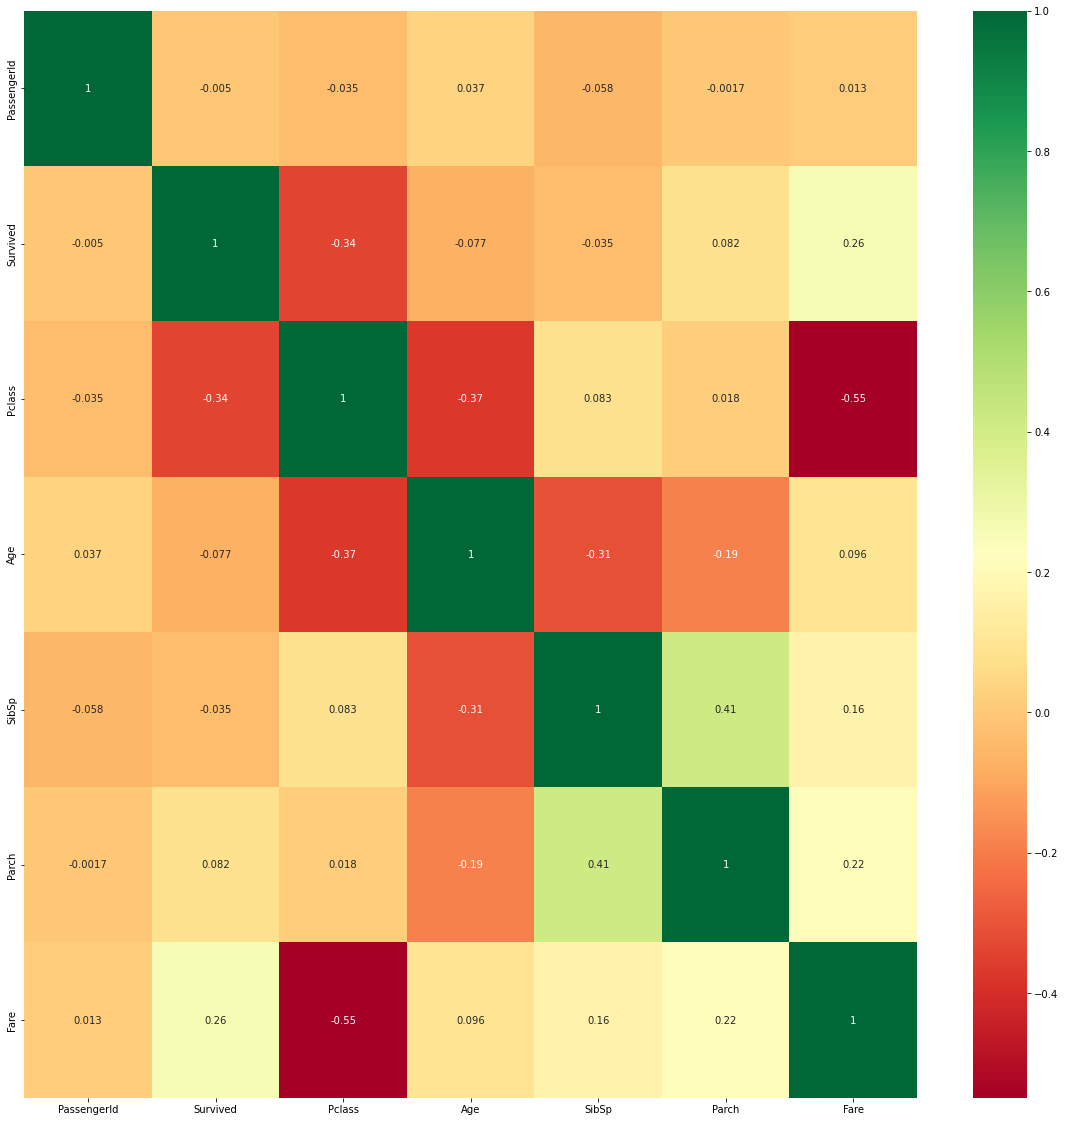

In [11]:
corrmat = Titanic_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
sns.heatmap(Titanic_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Dark green color shows more positive and red color show more negative correlation here.

As we got from the correlation table, Fare column has the highest correlation and Pclass has the lowest correlation with the target variable "Survived". This can be seen from the visualization here.

Apart from Heatmap , we have used correlation method (using corr()) and pair plot to find the correlation. As a result, we are not finding any relevant relationship among the given independent variables here.

## Categorical Count

In categorical count, we count number of passengers on the basis of different columns such as Embarked, Pclass and Sex.

In [13]:
# Categorical count
Titanic_dataset['Embarked'].value_counts()
percent100 = Titanic_dataset['Embarked'].value_counts(normalize=True).mul(100).round(1).astype(str) 
Embarked=pd.DataFrame({'counts': Titanic_dataset['Embarked'].value_counts(), 'per100': percent100}).head(5)
Embarked


,counts,per100
S,644,72.4
C,168,18.9
Q,77,8.7


In our dataset, 644 passengers belonged to S, 168 belonged to C and 77 belonged to Q in Embarked column. But, out of 891 only 2 passengers are not belonged to any S,C and Q. So, these are missing values in our dataset.

In [14]:
Titanic_dataset['Pclass'].value_counts()
percent100 = Titanic_dataset['Pclass'].value_counts(normalize=True).mul(100).round(1).astype(str) 
Pclass=pd.DataFrame({'counts': Titanic_dataset['Pclass'].value_counts(), 'per100': percent100}).head(5)
Pclass

,counts,per100
3,491,55.1
1,216,24.2
2,184,20.7


In our dataset, 216 passengers belonged to Pclass 1, 184 belonged to Pclass 2 and 491 passengers belonged to Pclass 3. 

In [15]:
Titanic_dataset['Sex'].value_counts()
percent100 = Titanic_dataset['Sex'].value_counts(normalize=True).mul(100).round(1).astype(str) 
Sex=pd.DataFrame({'counts': Titanic_dataset['Sex'].value_counts(), 'per100': percent100}).head(5)
Sex

,counts,per100
male,577,64.8
female,314,35.2


In our dataset, number of male passengers were more as compared to female passengers. 577 were male and 314 were female.

## Check Outliers

For checking the outliers we used Box Plot.

Box plot is a graphical representation of data based on minimum values, firts quartile, median, third quartile and maximum values. Here, we used box plot for checking outliers in our dataset.

<function matplotlib.pyplot.show(close=None, block=None)>

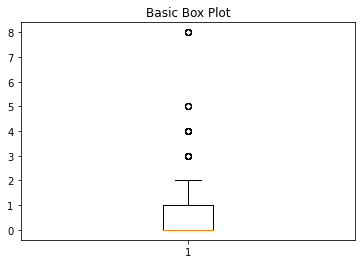

In [16]:

fig, ax = plt.subplots()
ax.set_title('Basic Box Plot')
ax.boxplot(Titanic_dataset['SibSp'])
plt.show

This box plot shows that there is no outliers in Sibsp column.

Using box plot we checked outliers for Parch columnand sibsp column and found no dangerous outliers.

## Data Preparation

Data preparation is a first step in which we can clean our data and transform into an informative way, which can help in making predictions. In data preparation we have check columns having duplicate values and null values and also dropped unnecesary columns.

## Duplicate values

In [18]:
#Check Duplicates
#Checking the duplicate values
print("Number of duplicates in dataset:{}".format(Titanic_dataset[["Name","Age"]].duplicated().sum()))

Number of duplicates in dataset:0


In our dataset we also checked duplicate values. Here, Name and Age column having zero duplicate values.

## Null values

In [19]:
Titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In our dataset Age, Cabin and Embarked column having null values 177, 687 and 2 respectively.

In [20]:
#Filling the missed values - Embarked with its mode
Emb_mode=st.mode(Titanic_dataset.Embarked)
Titanic_dataset['Embarked'].fillna(Emb_mode,inplace=True)

In our dataset we replaced null values of Embarked column with the help of mode.

In [21]:
#Converting Sex categorical value into binary value
Titanic_dataset["Sex"].replace({"male": "0", "female": "1"}, inplace=True)
Titanic_dataset['Sex']=Titanic_dataset['Sex'].astype('int64')
embark= pd.get_dummies(Titanic_dataset["Embarked"])
Titanic_dataset=pd.concat([Titanic_dataset,embark],axis=1)
##Dropping Unnecessary columns and also columns has null values
Titanic_dataset.drop([ "Name","Ticket","Embarked"],axis=1,inplace=True)
Titanic_dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
C                uint8
Q                uint8
S                uint8
dtype: object

In [22]:
#Check whether null values exists
Titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
C                0
Q                0
S                0
dtype: int64

Here, Age and Cabin column having missing values. But both are unnecessary columns in our dataset so, we dropped these two columns.

In [23]:
##Dropping Unnecessary columns and also columns has null values
Titanic_dataset.drop([ "Cabin","Age"],axis=1,inplace=True)

# Feature Selection

Feature selection is a key step in our project in order to sort out the irrelevant independent variables from relevant ones. We have done this to enhance the correctness of our model and to minimize intricacy. Having irrelevant features in data can decrease the accuracy of the model.


Feature selection:
- Enables a machine learning algorithm to train faster
- Reduces the complexity of a model
- Makes it easier to interpret
- Improves the accuracy of a model if the right subset is 
  chosen
- Reduces overfitting.

### Method 1: Chi-Squared Method 

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

Here we have used SelectKbest class to extract top 5 best features from our dataset. 

In [24]:
#apply SelectKBest class to extract top 5 best features
X = Titanic_dataset.iloc[:,2:10]  #independent columns
y = Titanic_dataset.iloc[:,1] 
X
y
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
featureScores
# print(featureScores.nlargest(5,'Score'))  #print 5 best features

,Feature,Score
0,Pclass,30.873699
1,Sex,170.348127
2,SibSp,2.581865
3,Parch,10.097499
4,Fare,4518.319091
5,C,20.464401
6,Q,0.010847
7,S,5.489205


Here, Corresponding to each features, a score is calculated. The feature which having the 
highest score has the highest relevance. Our result exhibits that “Fare”, “Sex”, “Pclass”, “C” 
and “Parch” are the features with top scores. Among this, Fare is the most relevant feature.

We have aslo used Pearson correlation,feature importance with tree based classifiers to select common relevant features.

# NORMALIZATION
In normalization we changed the numerical values to a common scale, without distorting any differnces between values.

In [29]:

import pandas as pd
from sklearn import preprocessing

data = Titanic_dataset[['Fare']]
cols = data.columns
df = pd.DataFrame(data)
df

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)

df_normalized = pd.DataFrame(np_scaled, columns = cols)
df_normalized

,Fare
0,0.014151
1,0.139136
2,0.015469
3,0.103644
4,0.015713
...,...
886,0.025374
887,0.058556
888,0.045771
889,0.058556


In our dataset, we normalized the fare column with the help of min-max scaling method.

In [30]:
#Deleting old fare columns to insert normalized fare column
del Titanic_dataset['Fare']
Titanic_dataset

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,C,Q,S
0,1,0,3,0,1,0,0,0,1
1,2,1,1,1,1,0,1,0,0
2,3,1,3,1,0,0,0,0,1
3,4,1,1,1,1,0,0,0,1
4,5,0,3,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,0,0,0,1
887,888,1,1,1,0,0,0,0,1
888,889,0,3,1,1,2,0,0,1
889,890,1,1,0,0,0,1,0,0


Our normalization of fare column, we dropped the old fare column from our dataset.

In [31]:
Titanic_dataset.insert(6, "Fare",df_normalized, True)

In [32]:
Titanic_dataset

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,C,Q,S
0,1,0,3,0,1,0,0.014151,0,0,1
1,2,1,1,1,1,0,0.139136,1,0,0
2,3,1,3,1,0,0,0.015469,0,0,1
3,4,1,1,1,1,0,0.103644,0,0,1
4,5,0,3,0,0,0,0.015713,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,0,0.025374,0,0,1
887,888,1,1,1,0,0,0.058556,0,0,1
888,889,0,3,1,1,2,0.045771,0,0,1
889,890,1,1,0,0,0,0.058556,1,0,0


Now, we add fare column with normalized values in our dataset.

# MODEL SELECTION

#Based on our findings that our target variable is binary, no outliers in our data and slight correlation among variables tends us to use Logistic regression.


Logistic regression is a linear classification technique for binary classification where the model predicts the likelihood that the passenger can be survived, 1 for survived and 0 for not survived. To train a model, the datasets got separated into training data (75%) and testing data (25%) using below command.

# Model (1):- Logistic Regression

In [33]:
X = Titanic_dataset[['Pclass', 'Sex','SibSp','Parch','Fare','C','Q','S']]
y = Titanic_dataset['Survived']
display(X.shape, y.shape)

(891, 8)

(891,)

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

#### Displaying the number of datas in training and test dataset

In [35]:
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(668, 8)

(668,)

(223, 8)

(223,)

#### Applying the logistic regression model on training data set

In [36]:
lr = LogisticRegression(fit_intercept = False, C = 1e9)
lr.fit(X_train,y_train)

LogisticRegression(C=1000000000.0, fit_intercept=False)

# Predict the test dataset

In [37]:
y_pred = lr.predict(X_test)

In [38]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1], dtype=int64)

# Create confusion matrix

Confusion matrix is one of the performance measurement ways for machine learning models. It is a table four different combinations of actual values and predicted values.Here , we can get the details of true positives, true negatives, false positives and false negatives.  It helps to identify the accuracy , precision ,recall and f measure

In [39]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[118,  21],
       [ 25,  59]], dtype=int64)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

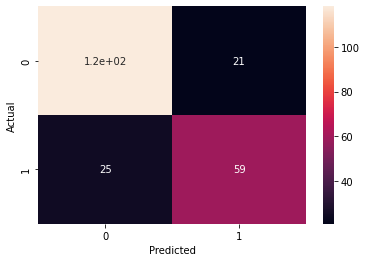

In [40]:
cnf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cnf_matrix, annot=True)

In [41]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred)
print('F1: %f' % f1)

# ROC AUC
auc1 = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc1)
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

Accuracy: 0.793722
Precision: 0.737500
Recall: 0.702381
F1: 0.719512
ROC AUC: 0.775651
[[118  21]
 [ 25  59]]


ACCURACY is a ratio of correctly predicted values to the total values. Though accuracy is a great measure but it is better when you have symmetric datasets where values of false positive and false negatives are almost same. So we are considering the other parameters like Precision, recall and F1

PRECISION is the ratio of correctly predicted positive values to the total predicted positive values.i.e among all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.73 precision which is pretty good.

RECALL (Sensitivity) is the ratio of correctly predicted positive values to the all values in actual class i.e  Of all the passengers that truly survived, how many did we label? We have got recall of 0.70 which is good for this model as it’s above 0.5.

F1 SCORE is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives.



##### Based on the above results, we can understood that following features Sex,Fare,C are significant in finding target values.We have considered coefficient as they describe the change in target variable for change in this independent variable.

# Model (2):- KNN


#### K-nearest neighbors (KNN) algorithm is a kind of supervised ML algorithm which can be used for classification and regression. We have found the best K value and distance metrics using below comments where the number of neighbours are in odd values as to avoid ties in voting 


In [44]:
# model building using KNN classifier:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

knn_model = KNeighborsClassifier()

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
knn_params = {'n_neighbors':[5,7,9,11,13],'metric':['minkowski','manhattan','chebyshev']}

# evaluate model
knn_GS = GridSearchCV(knn_model, knn_params, scoring="accuracy", cv = cv, n_jobs=-1)
knn_GS.fit(X_train,y_train)


print(knn_GS.best_params_)
print(knn_GS.best_score_)


{'metric': 'manhattan', 'n_neighbors': 9}
0.8003740695021135


Accuracy: 0.780269
Precision: 0.746479
Recall: 0.630952
F1: 0.683871
ROC AUC: 0.750728


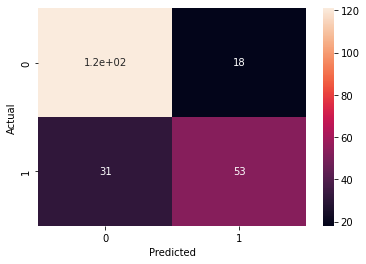

In [45]:

# Evaluating the model on the validation set:
from sklearn.metrics import confusion_matrix
clf = KNeighborsClassifier(n_neighbors=9,metric='manhattan')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
confusion_matrix(y_test,y_pred)

cnf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cnf_matrix, annot=True)

accuracy3 = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy3)
precision3 = precision_score(y_test, y_pred)
print('Precision: %f' % precision3)
recall3 = recall_score(y_test, y_pred)
print('Recall: %f' % recall3)
f13 = f1_score(y_test, y_pred)
print('F1: %f' % f13)

# ROC AUC
auc3 = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc3)
matrix3 = confusion_matrix(y_test, y_pred)


In [46]:
from tabulate import tabulate
data = [["Logistic regression", accuracy,precision,recall,f1,auc1], 
        ["KNN", accuracy3,precision3,recall3,f13,auc3]]
  
#define header names
col_names = ["Model", "Accuracy","precision","recall","f1","Roc"]
  
#display table
print(tabulate(data, headers=col_names))





Model                  Accuracy    precision    recall        f1       Roc
-------------------  ----------  -----------  --------  --------  --------
Logistic regression    0.793722     0.7375    0.702381  0.719512  0.775651
KNN                    0.780269     0.746479  0.630952  0.683871  0.750728


In [47]:
y_prob = lr.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.


y_prob1 = clf.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred1 = np.where(y_prob1 > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.


Text(0.63, 0.4, 'Less accurate area')

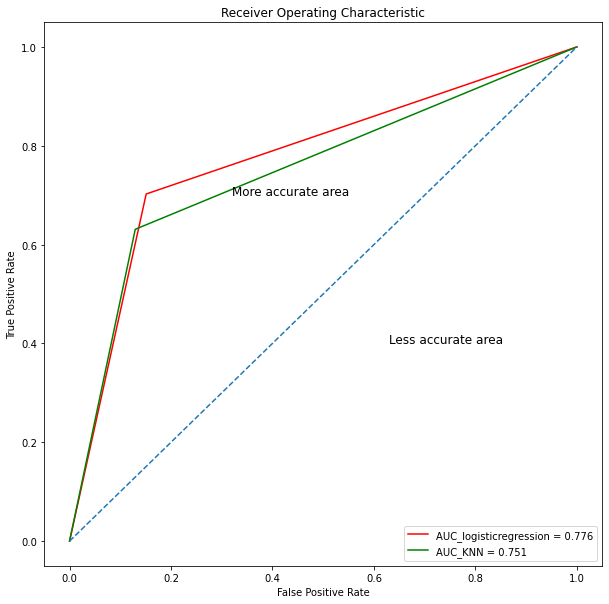

In [48]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

false_positive_rate1, true_positive_rate1, thresholds1 = roc_curve(y_test, y_pred1)
roc_auc1 = auc(false_positive_rate1, true_positive_rate1)


import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC_logisticregression = %0.3f' % roc_auc)
plt.plot(false_positive_rate1,true_positive_rate1, color='Green',label = 'AUC_KNN = %0.3f' % roc_auc1)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)


#### Apart from confusion matrix, accuracy,precision,recall and F1 score, Area under the ROC curve is also used to evaluate the model. The diagonal line in this graph denotes 50-50 partitioning. If the curve is closer to this line,it denotes lower performance of the model. In our case, logistic regression curve is farer from the KNN curve and the line,so model performs well.

Comparing the models based on the metrics (accuracy, Precision, F1 score, Recall, ROC and AUC score) shows us clear picture of the best prediction model for this data set, it is Logistic regression model than KNN. 



## Testing our logistic regression model with sample data


In [49]:
# Given sample data and finding its survival status


Titanic_testset = pd.read_csv('test.csv')

X = Titanic_testset[['Pclass', 'Sex','Parch','Fare','C']]
y = Titanic_testset['Survived']
display(X.shape, y.shape)



(12, 5)

(12,)

In [50]:
lr = LogisticRegression(fit_intercept = False, C = 1e9)
lr.fit(X,y)
y_pred = lr.predict(X)
y_pred


array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

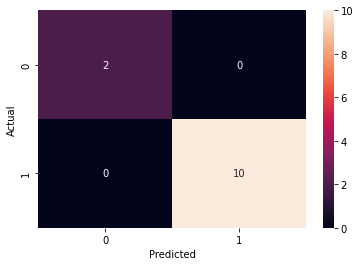

In [51]:

confusion_matrix(y,y_pred)

cnf_matrix = pd.crosstab(y, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cnf_matrix, annot=True)



Tested this model with sample data and found its prediction is 100% accurate